# BCI Python Project

Converting BCI project from BE521

### 1. Load in subject data

3 files loaded in from BCI Competition Website. Dataset 4.   

    1. sub1_comp.mat
    2. sub2_comp.mat
    3. sub3_comp.mat

Each file contains train_data, test_data, train_dg 

In [19]:
import scipy.io as sio 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [10]:
sub1 = sio.loadmat('BCICIV_4_mat/sub1_comp.mat')
sub1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Jul 23 16:48:22 2008',
 '__version__': '1.0',
 '__globals__': [],
 'train_data': array([[  193,  -491, -4293, ...,  1827,  3096,  2395],
        [   96,  -451, -4419, ...,  1794,  3120,  2497],
        [  329,  -272, -4380, ...,  1668,  3236,  2569],
        ...,
        [ 1047,  -588,  1257, ...,  3559,  2951,  1856],
        [  841,  -834,   962, ...,  3342,  2703,  2135],
        [  672, -1009,   563, ...,  3131,  2515,  2187]], dtype=int32),
 'test_data': array([[  389, -1214,   112, ...,  2829,  2215,  1900],
        [  -99, -1495,  -258, ...,  2482,  1834,  1207],
        [ -501, -1661,  -265, ...,  2331,  1638,   347],
        ...,
        [ 1979,  4323,  -744, ...,   305, -1002, -1931],
        [ 2259,  4593,  -660, ...,   256,  -828, -1891],
        [ 2460,  4623,  -641, ...,   154,  -662, -1981]], dtype=int16),
 'train_dg': array([[-0.40011286,  0.1732757 ,  0.99956459, -0.06184273,  0.41964019],
       

The cell above loads displays the output of the mat file. It loads as a dictionary and we can access the training data with the code below:

In [16]:
train1 = sub1['train_data']
train1 

array([[  193,  -491, -4293, ...,  1827,  3096,  2395],
       [   96,  -451, -4419, ...,  1794,  3120,  2497],
       [  329,  -272, -4380, ...,  1668,  3236,  2569],
       ...,
       [ 1047,  -588,  1257, ...,  3559,  2951,  1856],
       [  841,  -834,   962, ...,  3342,  2703,  2135],
       [  672, -1009,   563, ...,  3131,  2515,  2187]], dtype=int32)

In [17]:
train1.shape

(400000, 62)

## A Simple Method  

1. Use a moving window 100 ms in length with 50 ms overlap and extract the same 6 features over each of the channels. Features were:  
    1. Average time-domain voltage  
    2. Average Frequency-domain magnitude in   
       5-15 Hz    
    3. 20-25 Hz  
    4. 75-115 Hz  
    5. 125-160 Hz  
    6. 160-175 Hz

2. Downsample dataglove traces so that each sample was separated by 50 ms, to keep them on the same time scale as the features

3. Used a linear regression to predict downampled finger flextion from all the EEG features from the previous 3 time windows (150 ms lag)

4. interpolate the prediction using a cubic spline back up to the riginal 1000 Hz sampling frequency, making sure that the first and last points in the data interpolaion were values we know. The interpolation was zero-padded at the beginning and end to time-align with the original flexion trace

First let's take a look at some plots of the training data and the data glove traces

Use a moving window to calculate the 6 features above. 

In [60]:
window = np.ones([100,])
avg_channel1 = np.convolve(channel1, window, 'valid') 
avg_channel1.shape

(399901,)

In [63]:
test = avg_channel1[0::50]


In [70]:
# Creating a time vector
t = np.arange(50,400000,50)
t

array([    50,    100,    150, ..., 399850, 399900, 399950])

In [68]:
downsampled = avg_channel1[0::50]

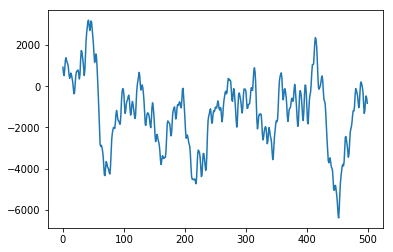

In [84]:
channel1 = train1[:,4]
plt.plot(channel1[0:500])
#plt.plot(t[0:10],downsampled[0:10])
plt.show()